In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pysal.viz.mapclassify as mc
from matplotlib.colors import rgb2hex

C:\Users\kevin\Anaconda3\lib\site-packages\pysal\explore\segregation\network\network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
C:\Users\kevin\Anaconda3\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


os.getcwd()

In [2]:
os.chdir('Data')

In [3]:
os.listdir()

['Florida', 'FLPoverty.csv', 'flpoverty2018.csv', 'FLTurnout.csv']

In [4]:
poverty = pd.read_csv('FLPoverty.csv')

In [5]:
poverty['ccode'] = poverty['ccode'].astype(float)
poverty.head()

,County,pov2010,pov2012,pov2014,pov2016,pov2018,ccode
0,Alachua,23.6,23.8,25.4,24.2,21.2,1.0
1,Baker,17.0,17.0,18.6,18.5,15.3,3.0
2,Bay,12.4,13.3,14.8,15.6,14.9,5.0
3,Bradford,16.0,20.1,19.3,19.3,19.1,7.0
4,Brevard,10.5,12.5,14.0,14.0,12.4,9.0


In [6]:
turnout = pd.read_csv("FLTurnout.csv")

In [7]:
turnout['ccode'] = turnout['ccode'].astype(float)
for i, row in turnout.iterrows():
    if row['trn2010'] == 0:
        turnout.loc[i, 'trn2010'] = np.nan
    if row['trn2012'] == 0:
        turnout.loc[i, 'trn2012'] = np.nan
    if row['trn2014'] == 0:
        turnout.loc[i, 'trn2014'] = np.nan
    if row['trn2016'] == 0:
        turnout.loc[i, 'trn2016'] = np.nan
    if row['trn2018'] == 0:
        turnout.loc[i, 'trn2018'] = np.nan
turnout.head()

,County,trn2010,trn2012,trn2014,trn2016,trn2018,ccode
0,Alachua,49.41,73.40,50.20,73.60,62.41,1.0
1,Baker,58.17,81.80,61.79,84.30,70.18,3.0
2,Bay,51.41,71.22,51.14,75.17,52.87,5.0
3,Bradford,NaN,NaN,55.44,76.25,64.95,7.0
4,Brevard,55.88,75.60,59.47,77.82,67.26,9.0


In [8]:
os.chdir('Florida')
os.listdir()

['1000-largest-us-cities-by-population-with-geographic-coordinates.dbf',
 '1000-largest-us-cities-by-population-with-geographic-coordinates.prj',
 '1000-largest-us-cities-by-population-with-geographic-coordinates.shp',
 '1000-largest-us-cities-by-population-with-geographic-coordinates.shx',
 'City_Locations.cpg',
 'City_Locations.dbf',
 'City_Locations.prj',
 'City_Locations.shp',
 'City_Locations.shx',
 'City_Locations.xml',
 'Florida_Counties.cpg',
 'Florida_Counties.dbf',
 'Florida_Counties.prj',
 'Florida_Counties.shp',
 'Florida_Counties.shx',
 'Florida_Counties.xml']

In [9]:
fl_counties = gpd.read_file('Florida_Counties.shp')

In [10]:
fl_counties.head()

,OBJECTID,DEPCODE,COUNTY,COUNTYNAME,DATESTAMP,ShapeSTAre,ShapeSTLen,geometry
0,1,21,041,GILCHRIST,2000-05-16T00:00:00.000Z,9.908353e+09,4.873000e+05,POLYGON ((-82.65813600527831 29.83028106592836...
1,2,54,107,PUTNAM,2000-05-16T00:00:00.000Z,2.305869e+10,7.629677e+05,POLYGON ((-81.58084263191225 29.83955869988373...
2,3,62,123,TAYLOR,2000-05-16T00:00:00.000Z,2.891747e+10,8.772527e+05,(POLYGON ((-83.73036687278116 30.3035764144186...
3,4,46,091,OKALOOSA,2000-05-16T00:00:00.000Z,2.562159e+10,1.087058e+06,(POLYGON ((-86.39159408384468 30.6497039172779...
4,5,7,013,CALHOUN,2000-05-16T00:00:00.000Z,1.604809e+10,6.313440e+05,POLYGON ((-84.93265667941331 30.60636534524649...


In [11]:
fl_counties['COUNTY'] = fl_counties['COUNTY'].astype(float)
fl_counties.head()

,OBJECTID,DEPCODE,COUNTY,COUNTYNAME,DATESTAMP,ShapeSTAre,ShapeSTLen,geometry
0,1,21,41.0,GILCHRIST,2000-05-16T00:00:00.000Z,9.908353e+09,4.873000e+05,POLYGON ((-82.65813600527831 29.83028106592836...
1,2,54,107.0,PUTNAM,2000-05-16T00:00:00.000Z,2.305869e+10,7.629677e+05,POLYGON ((-81.58084263191225 29.83955869988373...
2,3,62,123.0,TAYLOR,2000-05-16T00:00:00.000Z,2.891747e+10,8.772527e+05,(POLYGON ((-83.73036687278116 30.3035764144186...
3,4,46,91.0,OKALOOSA,2000-05-16T00:00:00.000Z,2.562159e+10,1.087058e+06,(POLYGON ((-86.39159408384468 30.6497039172779...
4,5,7,13.0,CALHOUN,2000-05-16T00:00:00.000Z,1.604809e+10,6.313440e+05,POLYGON ((-84.93265667941331 30.60636534524649...


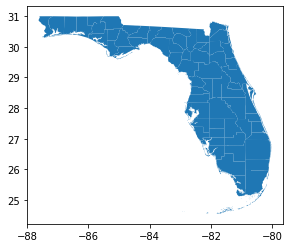

In [12]:
fl_counties.plot()

In [13]:
us_cities = gpd.read_file('1000-largest-us-cities-by-population-with-geographic-coordinates.shp')

In [14]:
us_cities.head()

,city,rank,state,growth_from,population,geometry
0,Marysville,552.0,Washington,115.7,63269.0,POINT (-122.1770818 48.0517637)
1,Perris,466.0,California,98.7,72326.0,POINT (-117.2286478 33.7825194)
2,Cleveland,48.0,Ohio,-18.1,390113.0,POINT (-81.6943605 41.49932)
3,Worcester,129.0,Massachusetts,5.8,182544.0,POINT (-71.8022934 42.2625932)
4,Columbia,192.0,South Carolina,11.7,133358.0,POINT (-81.0348144 34.0007104)


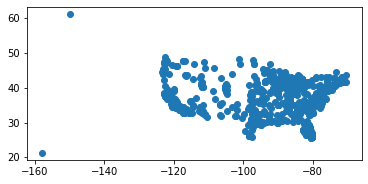

In [15]:
us_cities.plot()

In [16]:
fl_cities = us_cities.loc[us_cities['state'] == 'Florida']
fl_cities_big = fl_cities.loc[fl_cities['population'] >= 250000.0]

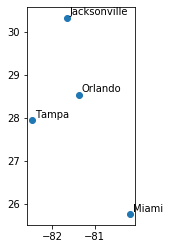

In [17]:
ax = fl_cities_big.plot()

for x, y, label in zip(fl_cities_big.geometry.x, fl_cities_big.geometry.y, fl_cities_big.city):
    ax.annotate(label, xy=(x, y), xytext=(3,3), textcoords="offset points")

In [18]:
fl_counties_pov = fl_counties.merge(poverty, left_on = 'COUNTY', right_on = 'ccode', how = 'left')

In [19]:
fl_counties_pov.head(67)

,OBJECTID,DEPCODE,COUNTY,COUNTYNAME,DATESTAMP,ShapeSTAre,ShapeSTLen,geometry,County,pov2010,pov2012,pov2014,pov2016,pov2018,ccode
0,1,21,41.0,GILCHRIST,2000-05-16T00:00:00.000Z,9.908353e+09,4.873000e+05,POLYGON ((-82.65813600527831 29.83028106592836...,Gilchrist,20.1,21.9,24.9,23.8,16.1,41.0
1,2,54,107.0,PUTNAM,2000-05-16T00:00:00.000Z,2.305869e+10,7.629677e+05,POLYGON ((-81.58084263191225 29.83955869988373...,Putnam,23.3,25.5,26.5,27.0,26.3,107.0
2,3,62,123.0,TAYLOR,2000-05-16T00:00:00.000Z,2.891747e+10,8.772527e+05,(POLYGON ((-83.73036687278116 30.3035764144186...,Taylor,19.1,19.1,13.8,14.8,23.8,123.0
3,4,46,91.0,OKALOOSA,2000-05-16T00:00:00.000Z,2.562159e+10,1.087058e+06,(POLYGON ((-86.39159408384468 30.6497039172779...,Okaloosa,10.6,12.5,13.7,12.0,10.9,91.0
4,5,7,13.0,CALHOUN,2000-05-16T00:00:00.000Z,1.604809e+10,6.313440e+05,POLYGON ((-84.93265667941331 30.60636534524649...,Calhoun,21.1,24.8,22.5,13.1,21.1,13.0
5,6,50,99.0,PALM BEACH,2000-05-16T00:00:00.000Z,6.149159e+10,1.522727e+06,(POLYGON ((-80.11189805095071 26.9706879617934...,Palm Beach,12.2,14.0,14.6,13.9,11.8,99.0
6,7,56,111.0,ST. LUCIE,2000-05-16T00:00:00.000Z,1.614948e+10,8.295187e+05,(POLYGON ((-80.23991747525355 27.2651852647402...,St. Lucie,13.7,16.6,18.4,17.9,9.2,111.0
7,8,51,101.0,PASCO,2000-05-16T00:00:00.000Z,2.126081e+10,7.393906e+05,(POLYGON ((-82.05534449850346 28.4489598075182...,Pasco,12.3,13.7,14.3,13.6,13.0,101.0
8,9,20,39.0,GADSDEN,2000-05-16T00:00:00.000Z,1.474496e+10,6.736124e+05,POLYGON ((-84.28257872708906 30.68505957879821...,Gadsden,27.6,29.5,27.2,25.6,23.1,39.0
9,10,37,73.0,LEON,2000-05-16T00:00:00.000Z,1.958402e+10,8.079897e+05,POLYGON ((-84.00743103413359 30.67206747675587...,Leon,22.0,22.8,23.7,21.3,18.0,73.0


In [20]:
fl_counties_pov.describe()

,OBJECTID,DEPCODE,COUNTY,ShapeSTAre,ShapeSTLen,pov2010,pov2012,pov2014,pov2016,pov2018,ccode
count,67.000000,67.000000,67.000000,6.700000e+01,6.700000e+01,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,34.000000,34.000000,67.000000,2.342932e+10,1.048655e+06,15.998507,17.728358,18.519403,17.777612,16.562687,67.000000
std,19.485037,19.485037,38.970074,1.149607e+10,5.982756e+05,4.931639,5.070378,5.204143,5.062273,5.112428,38.970074
min,1.000000,1.000000,1.000000,6.963394e+09,4.206436e+05,8.500000,9.800000,9.700000,9.000000,8.300000,1.000000
25%,17.500000,17.500000,34.000000,1.620782e+10,7.373391e+05,12.150000,13.850000,14.350000,13.950000,12.100000,34.000000
50%,34.000000,34.000000,67.000000,1.964766e+10,8.939740e+05,15.200000,16.500000,17.700000,16.900000,15.900000,67.000000
75%,50.500000,50.500000,100.000000,2.820891e+10,1.172507e+06,19.650000,21.750000,22.350000,21.000000,21.150000,100.000000
max,67.000000,67.000000,133.000000,6.149159e+10,4.591182e+06,27.600000,29.700000,30.800000,29.900000,28.300000,133.000000


In [21]:
fl_counties_trn = fl_counties.merge(turnout, left_on = 'COUNTY', right_on = 'ccode', how = 'left')

In [22]:
fl_counties_trn.head()

,OBJECTID,DEPCODE,COUNTY,COUNTYNAME,DATESTAMP,ShapeSTAre,ShapeSTLen,geometry,County,trn2010,trn2012,trn2014,trn2016,trn2018,ccode
0,1,21,41.0,GILCHRIST,2000-05-16T00:00:00.000Z,9.908353e+09,4.873000e+05,POLYGON ((-82.65813600527831 29.83028106592836...,Gilchrist,50.40,71.95,54.56,74.55,63.07,41.0
1,2,54,107.0,PUTNAM,2000-05-16T00:00:00.000Z,2.305869e+10,7.629677e+05,POLYGON ((-81.58084263191225 29.83955869988373...,Put0m,49.50,72.70,51.00,70.62,59.96,107.0
2,3,62,123.0,TAYLOR,2000-05-16T00:00:00.000Z,2.891747e+10,8.772527e+05,(POLYGON ((-83.73036687278116 30.3035764144186...,Taylor,NaN,NaN,55.86,76.47,65.89,123.0
3,4,46,91.0,OKALOOSA,2000-05-16T00:00:00.000Z,2.562159e+10,1.087058e+06,(POLYGON ((-86.39159408384468 30.6497039172779...,Okaloosa,48.41,73.78,49.85,75.70,62.50,91.0
4,5,7,13.0,CALHOUN,2000-05-16T00:00:00.000Z,1.604809e+10,6.313440e+05,POLYGON ((-84.93265667941331 30.60636534524649...,Calhoun,51.77,75.28,50.95,72.09,53.53,13.0


In [23]:
for i, row in fl_counties_trn.iterrows():
    if row['trn2010'] == 0:
        fl_counties_trn.loc[i, 'trn2010'] = np.nan
    if row['trn2012'] == 0:
        fl_counties_trn.loc[i, 'trn2012'] = np.nan
    if row['trn2014'] == 0:
        fl_counties_trn.loc[i, 'trn2014'] = np.nan
    if row['trn2016'] == 0:
        fl_counties_trn.loc[i, 'trn2016'] = np.nan
    if row['trn2018'] == 0:
        fl_counties_trn.loc[i, 'trn2018'] = np.nan
        
fl_counties_trn.head()

,OBJECTID,DEPCODE,COUNTY,COUNTYNAME,DATESTAMP,ShapeSTAre,ShapeSTLen,geometry,County,trn2010,trn2012,trn2014,trn2016,trn2018,ccode
0,1,21,41.0,GILCHRIST,2000-05-16T00:00:00.000Z,9.908353e+09,4.873000e+05,POLYGON ((-82.65813600527831 29.83028106592836...,Gilchrist,50.40,71.95,54.56,74.55,63.07,41.0
1,2,54,107.0,PUTNAM,2000-05-16T00:00:00.000Z,2.305869e+10,7.629677e+05,POLYGON ((-81.58084263191225 29.83955869988373...,Put0m,49.50,72.70,51.00,70.62,59.96,107.0
2,3,62,123.0,TAYLOR,2000-05-16T00:00:00.000Z,2.891747e+10,8.772527e+05,(POLYGON ((-83.73036687278116 30.3035764144186...,Taylor,NaN,NaN,55.86,76.47,65.89,123.0
3,4,46,91.0,OKALOOSA,2000-05-16T00:00:00.000Z,2.562159e+10,1.087058e+06,(POLYGON ((-86.39159408384468 30.6497039172779...,Okaloosa,48.41,73.78,49.85,75.70,62.50,91.0
4,5,7,13.0,CALHOUN,2000-05-16T00:00:00.000Z,1.604809e+10,6.313440e+05,POLYGON ((-84.93265667941331 30.60636534524649...,Calhoun,51.77,75.28,50.95,72.09,53.53,13.0


In [24]:
turnout_ds = turnout.describe()

Text(0.5, 1.0, 'Florida Poverty % by County')

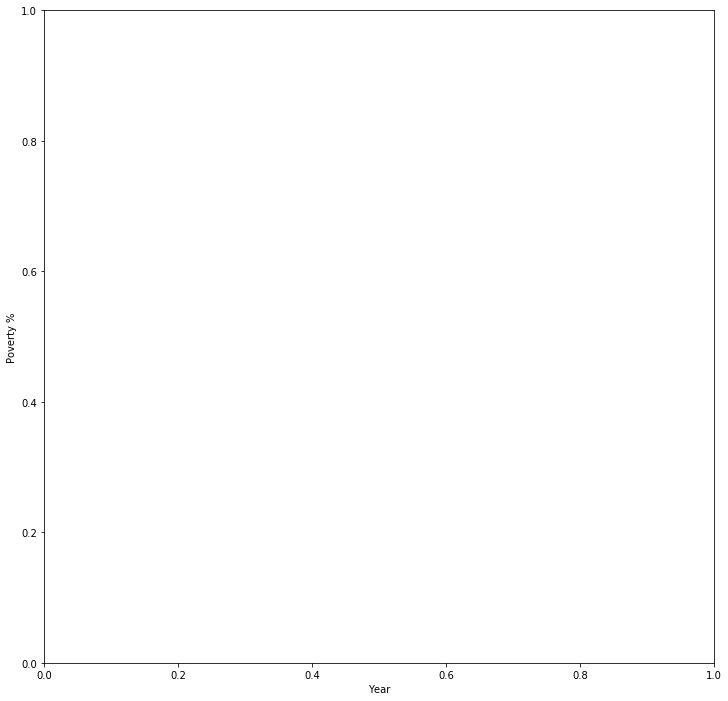

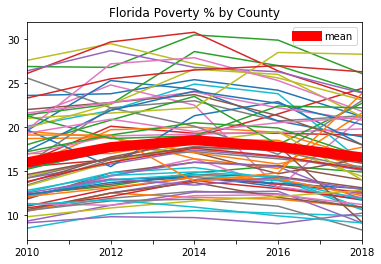

In [25]:
povplot = poverty.drop(columns = ['ccode'])
povplot = povplot.set_index('County').T
povplot = povplot.rename(index={'pov2010':'2010', 'pov2012':'2012', 'pov2014':'2014', 'pov2016':'2016', 'pov2018':'2018'})
fig, ax = plt.subplots(figsize = (12, 12))

mean = poverty.describe()
mean = mean.drop(columns = ['ccode'])
mean = mean.iloc[1]

mean = mean.rename(index={'pov2010':'2010', 'pov2012':'2012', 'pov2014':'2014', 'pov2016':'2016', 'pov2018':'2018'})


povplot.plot.line(legend = False)
mean.plot.line(legend = True, linewidth = 10, color = 'red')
ax.set_xlabel("Year")
ax.set_ylabel("Poverty %")
plt.title("Florida Poverty % by County")

In [26]:
trnplot = turnout.drop(columns = ['ccode'])
trnplot.head()


,County,trn2010,trn2012,trn2014,trn2016,trn2018
0,Alachua,49.41,73.40,50.20,73.60,62.41
1,Baker,58.17,81.80,61.79,84.30,70.18
2,Bay,51.41,71.22,51.14,75.17,52.87
3,Bradford,NaN,NaN,55.44,76.25,64.95
4,Brevard,55.88,75.60,59.47,77.82,67.26


In [27]:
for i, row in trnplot.iterrows():
    if row['trn2010'] == 0:
        trnplot.loc[i, 'trn2010'] = np.nan
    if row['trn2012'] == 0:
        trnplot.loc[i, 'trn2012'] = np.nan
    if row['trn2014'] == 0:
        trnplot.loc[i, 'trn2014'] = np.nan
    if row['trn2016'] == 0:
        trnplot.loc[i, 'trn2016'] = np.nan
    if row['trn2018'] == 0:
        trnplot.loc[i, 'trn2018'] = np.nan

trnplot = trnplot.set_index('County').T
trnplot = trnplot.rename(index={'trn2010':'2010', 'trn2012':'2012', 'trn2014':'2014', 'trn2016':'2016', 'trn2018':'2018'})

In [28]:
turnout_ds = turnout.describe()
turnout_ds.head()


,trn2010,trn2012,trn2014,trn2016,trn2018,ccode
count,43.000000,46.000000,60.000000,61.000000,66.000000,67.000000
mean,51.834651,72.983913,53.777333,74.740820,62.771667,67.000000
std,4.833928,4.445945,6.100381,3.950502,5.489694,38.970074
min,41.000000,59.800000,40.850000,64.470000,50.480000,1.000000
25%,49.295000,70.625000,49.947500,72.890000,59.742500,34.000000


Text(0.5, 1.0, 'Florida Turnout % by County')

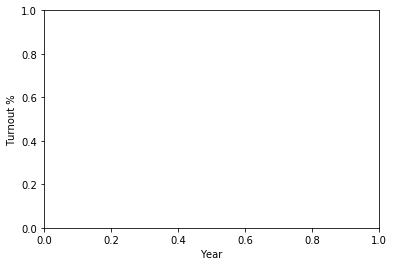

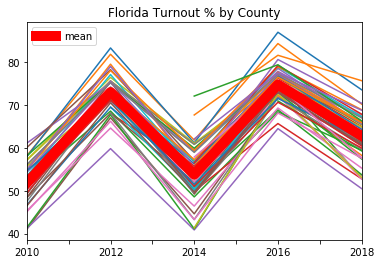

In [29]:
fig, ax = plt.subplots()

trnplot.plot.line(legend = False)
mean = turnout_ds.drop(columns = ['ccode'])
mean = mean.iloc[1]
mean = mean.rename(index={'trn2010':'2010', 'trn2012':'2012', 'trn2014':'2014', 'trn2016':'2016', 'trn2018':'2018'})
mean.plot.line(linewidth = 10, color = 'red', legend = 'TRUE')

ax.set_xlabel("Year")
ax.set_ylabel("Turnout %")
plt.title("Florida Turnout % by County")

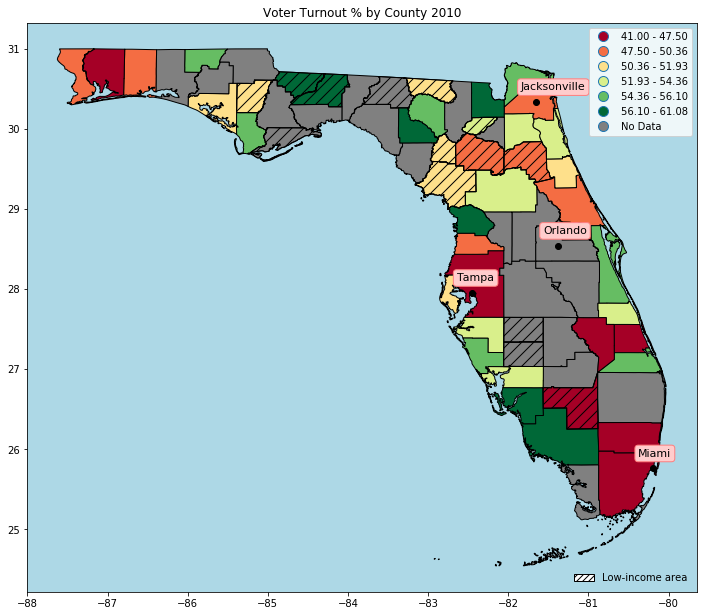

In [30]:
# categorize the numerical column
k = 6
quantiles = mc.Quantiles(fl_counties_trn.trn2010.dropna(), k=k)
fl_counties_trn['qnt2010'] = quantiles.find_bin(fl_counties_trn.trn2010).astype('str')

fl_counties_trn.loc[fl_counties_trn.trn2010.isnull(), 'qnt2010'] = 'No Data'

# add grey to a colormap to represent missing value
cmap = plt.cm.get_cmap('RdYlGn', k)
cmap_list = [rgb2hex(cmap(i)) for i in range(cmap.N)]
cmap_list.append('grey')
cmap_with_grey = colors.ListedColormap(cmap_list)

fig, ax = plt.subplots(figsize = (12,12))
ax.set_aspect('equal')
fl_counties_trn.plot(ax = ax, column='qnt2010', cmap = cmap_with_grey, edgecolor='black', legend=True)
fl_counties_pov[fl_counties_pov["pov2010"] >= 20].plot(ax = ax, facecolor='none', edgecolor = 'black', hatch="//")
fl_cities_big.plot(ax = ax, facecolor = 'black')

ax.set_facecolor('lightblue')
plt.title("Voter Turnout % by County 2010")

# get all upper bounds in the quantiles category
upper_bounds = quantiles.bins
# get and format all bounds
bounds = []
for index, upper_bound in enumerate(upper_bounds):
    if index == 0:
        lower_bound = fl_counties_trn.trn2010.min()
    else:
        lower_bound = upper_bounds[index-1]

    bound = f'{lower_bound:.2f} - {upper_bound:.2f}'
    bounds.append(bound)

LegendElement = [
                 mpatches.Patch(facecolor='w', hatch='////', edgecolor='k', label = "Low-income area")
                ]

# get all the legend labels
legend_labels = ax.get_legend().get_texts()
# replace the numerical legend labels
for bound, legend_label in zip(bounds, legend_labels):
    legend_label.set_text(bound)

from matplotlib.legend import Legend
leg = Legend(ax, LegendElement, ['Low-income area'],
             loc='lower right', frameon=False)
ax.add_artist(leg)



for x, y, label in zip(fl_cities_big.geometry.x, fl_cities_big.geometry.y, fl_cities_big.city):
    ax.annotate(label, xy=(x, y), xytext=(-15,12), textcoords="offset points", fontsize = 11, color = 'black', 
                bbox=dict(boxstyle="round", ec=(1.,0.5,0.5), fc=(1., 0.8, 0.8)))